<div id="section1"   dir='rtl'>
    <h2>
در این گام به بررسی گراف در اسپارک می پردازیم که نودهای ما یک سری مقالات هستند که به هم ربط دارند و از نسخه ی 2 اسپارک برای این گام استفاده می کنیم</div>
</h2>
        <hr>

Installing Spark Install Dependencies: ```

Java 8
Apache Spark with hadoop and
Findspark (used to locate the spark in the system)

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.6.tgz
!tar xf spark-2.4.8-bin-hadoop2.6.tgz
!pip -q install findspark graphframes

     |████████████████████████████████| 163kB 33.1MB/s 


Set Environment Variables:


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.6"

os.environ["HADOOP_HOME"] = os.environ["SPARK_HOME"]
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.0-spark2.4-s_2.11 pyspark-shell"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark



In [156]:
import pyspark
from pyspark.sql import functions as F
from graphframes import GraphFrame



install to googledrive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step1

read textfile vertex

<div id="section1"   dir='rtl'>
    <h2>
ابتدا دو فایل داده شده که فایل اول شاما مقالات با شناسه انها و  فایل بعدی شامل  شناسه مقالات مبدا و مقصدی که به هم ربط دارند(می توان گفت یال بین مقالات)، هستند را می خوانیم و قبل از ایجاد گراف باید ابتدا انها را به دیتافریم تبدیل کنیم</div>
</h2>
        <hr>

In [157]:
sc = spark.sparkContext
textfile1=sc.textFile("/content/drive/MyDrive/spark/Datasets/4/Vertex.txt")
textfile1.take(1)

['8774773382640701231\tList of Canadian Football League records (team)']

convert to dataframe

<div id="section1"   dir='rtl'>
    <h2>
 قبل از تبدیل فایل vertex به دیتافریم می بینیم که دیتای موجود در این فایل  با t/ از هم جدا شدند پس ما ابتدا با استفاده از تابع slipt در لامبدا انها را از هم جدا می کنیم سپس تبدیل به دیتا فریم می کنیم که همانطور که در دیتافریم می بینیم این دیتافریم که همان نود های ما را تشکیل می دهد شامل یک شناسه برای هر مقاله و نام مقاله است </div>
</h2>
        <hr>

In [158]:
vertxtfile = textfile1.map(lambda i: i.split("\t"))

V =vertxtfile .toDF(['id','article'])
V

id,article
8774773382640701231,List of Canadian ...
7761101435592530731,List of Football ...
8133629125642450577,Template:2004 Foo...
7698287352205296646,File:North Melbou...
2097725138520422255,Georgia Football ...
6922631041164063688,Football at the 2...
1197038737428485418,Wikipedia:Miscell...
2558316557265591251,Football at the 2...
1775630591844818068,Serbian Football ...
4205664098526595262,Wikipedia:WikiPro...


read textfile edges

In [159]:
textfile2=sc.textFile("/content/drive/MyDrive/spark/Datasets/4/edges.txt")
textfile2.take(1)

['3205189634386258258\t5457500977524455425']

convert to dataframe

<div id="section1"   dir='rtl'>
    <h2>
 قبل از تبدیل فایل edges به دیتافریم می بینیم که دیتای موجود در این فایل  با t/ از هم جدا شدند پس ما ابتدا با استفاده از تابع slipt در لامبدا انها را از هم جدا می کنیم سپس تبدیل به دیتا فریم می کنیم که همانطور که در دیتافریم می بینیم این دیتافریم که همان یال های ما را تشکیل می دهد  </div>
</h2>
        <hr>

In [160]:
edgesfile = textfile2.map(lambda i: i.split("\t"))
E =edgesfile .toDF(['src','dst'])
E

src,dst
3205189634386258258,5457500977524455425
7434181864825576211,3992155592538800813
7434181864825576211,5174708811275211225
7434181864825576211,8966872558455706256
1138969658277506929,5505576703264774438
1138969658277506929,1164529579716212743
2222343049558298343,1053024296822917414
8566059941063208536,3900444673608155009
8566059941063208536,7393390053880347144
8566059941063208536,8294988945536784024


Create a GraphFrame

<div id="section1"   dir='rtl'>
    <h2>
 حال گراف با را بادستور GraphFrame ایجاد می کنیم که ورودی این دستور نود و یال های ما هستند </div>
</h2>
        <hr>

In [161]:
from graphframes import *
G = GraphFrame(V, E)
G

GraphFrame(v:[id: string, article: string], e:[src: string, dst: string])

#step2

<div id="section1"   dir='rtl'>
    <h2>
این گام دو بخش دارد که در بخش اول از ما خواسته شده است بیشترین درجه ورودی (یعنی  نودی که بیشترین مقالات به ان به اصلاح وارد شده را پیدا کنیم   </div>
</h2>
        <hr>

In [162]:
from pyspark.sql.functions import desc


<div id="section1"   dir='rtl'>
    <h2>
می توان با استفاده از دستور inDegrees در گراف استفاده کرد که درجه ورودی مقالات را می دهد سپس نزولی با استفاده از orderby(desc"inDegree")مرتب کنیم و اولین که بیشترین درجه را دارد نمایش دهیم که 327 بیشترین درجه ی ورودی در این گراف است یعنی یک مقاله است که 327 مقاله به ان وارد شدند </div>
</h2>
        <hr>

In [163]:
inDeg = G.inDegrees
inDeg.orderBy(desc("inDegree")).limit(1)

id,inDegree
946065507707541358,327


<div id="section1"   dir='rtl'>
    <h2>
می توان با استفاده از دستور outDegrees در گراف استفاده کرد که درجه ورودی نودها را می دهد سپس نزولی با استفاده از orderby(desc"outDegree")مرتب کنیم و اولین که بیشترین درجه را دارد نمایش دهیم که 264 بیشترین درجه ی خروجی در این گراف است </div>
</h2>
        <hr>



In [164]:
outDeg = G.outDegrees
outDeg.orderBy(desc("outDegree")).limit(1)

id,outDegree
3841755165517709241,264


#step3

<div id="section1"   dir='rtl'>
    <h2>
در واقع اینجا سایز ConnectedComponent از ما خواسته شده است که به اصلاح یعنی این گراف بزرگ یک سری زیرگراف در خودش دارد که هر کدام از این زیر گراف های یک سری نود(مقاله) دارند این مقاله ها همبند هستند یعنی به هم راه دارند ما ابتدا با استفاده از تابع connectedcomponenets شناسه کامپوننت ها و نود های انها را بدست می اوریم سپس این کامپوننت ها را گروپ بای می کنیم  چون این نود ها اگر به متصل باشند به هرکدام یک کامپوننت مشترک داده می شود سپس با استفاده از count تعداد این این نودهای مشترک را برای هر کامپوننت منحصر فرد می شماریم و نمایش می دهیم مثلا کامپوننت اول که شناسه ی منحصر به فرد دارد، 6477 مقاله در به هم در این زیرگراف مرتبط هستند     </div>
</h2>
        <hr>

In [165]:
spark.sparkContext.setCheckpointDir("/tmp/checkpoints")

componnet = G.connectedComponents()# it takes 1 minute

G_component=componnet.groupby('component').count().orderBy(desc("count"))


<div id="section1"   dir='rtl'>
    <h2>
اسم ستون ها را برای درک بهتر به شناسه کامپوننت و تعداد نودهای هر کامپوننت(سایز هر کامپوننت) تغییر می دهیم</div>
</h2>
        <hr>

In [166]:
from pyspark.sql.functions import col

mapping = dict(zip(['component', 'count']

                   , ['component_id', 'nodes_count']))
G_component.select([col(c).alias(mapping.get(c, c)) for c in G_component.columns])

component_id,nodes_count
1,6477
42949672979,52
85899345921,35
163208757270,14
8589934631,14
77309411351,13
317827579922,13
68719476736,12
68719476765,11
34359738381,9


<div id="section1"   dir='rtl'>
    <h2>
در ادامه می خواهیم کامپوننت های قوی را نمایش دهیم یعنی بین هر دو مقاله مسیر وجود داشته باشد  </div>
</h2>
        <hr>

In [167]:
componnet.where("component != 0").show()

+-------------------+--------------------+-------------+
|                 id|             article|    component|
+-------------------+--------------------+-------------+
|8774773382640701231|List of Canadian ...|            1|
|7761101435592530731|List of Football ...|            1|
|8133629125642450577|Template:2004 Foo...|            1|
|7698287352205296646|File:North Melbou...|            1|
|2097725138520422255|Georgia Football ...| 103079215111|
|6922631041164063688|Football at the 2...|            1|
|1197038737428485418|Wikipedia:Miscell...| 137438953474|
|2558316557265591251|Football at the 2...|            1|
|1775630591844818068|Serbian Football ...|            1|
|4205664098526595262|Wikipedia:WikiPro...|            1|
|1033687574081081174|1943–44 Netherlan...|   8589934631|
|6862802626977892137|1948–49 Football ...|            1|
|3681282860489534792|1998–99 North Wes...|            1|
|8747320282862100730|1984–85 Football ...|            1|
|7895242920481704787|Template:1

<div id="section1"   dir='rtl'>
    <h2>
مانند بالا عمل می کنیم فقط از تابع stronglyConnectedComponents در گراف استفاده می کنیم</div>
</h2>
        <hr>

In [168]:
scc = G.stronglyConnectedComponents(maxIter=3) # it takes 2 mintutes
scc_graph=scc.groupBy("component").count().orderBy(desc("count"))

In [169]:
mapping = dict(zip(['component', 'count']

                   , ['component_id', 'nodes_count']))
scc_graph.select([col(c).alias(mapping.get(c, c)) for c in scc_graph.columns])

component_id,nodes_count
3,1678
8589934626,316
42,79
43,71
68719476762,48
25769803798,32
17179869207,23
42949672979,20
8589934592,18
60129542146,18


#step 4

<div id="section1"   dir='rtl'>
    <h2>
در این بخش از ما خواسته شده 10 تا از مقالات برتر را پیدا کنیم یعنی 10 مقاله ای بیشترین درجه ی ورودی را دارند که برای اینکار از بخش دوم به جای 1 مقاله 10 مقاله ی برتر سورت شده نزولی را می گیریم </div>
</h2>
        <hr>

In [170]:
max_article=inDeg.orderBy(desc("inDegree")).limit(10)
max_article

id,inDegree
946065507707541358,327
3856212023725725593,322
8978262722425160811,316
6245498229508734555,185
7264519433548233535,180
5362090331808156011,179
277710621679830671,149
1984578398767042266,145
2395551540800395672,134
5395033957924805072,130


<div id="section1"   dir='rtl'>
    <h2>
ریزالت بالا صرفا id این مقالات داده می شد  و برای اینکه نام این مقالات را بگیریم از join در sql استفاده می کنیم
  </div>
</h2>
        <hr>

<div id="section1"   dir='rtl'>
    <h2>
برای join من از sql استفاده کردم به این ترتیب که 2 جدول را گرفتم سپس id   را در این جدول ها مقایسه کردم و هر جا که id (یک جدول همان جدول ماکس ما است)با جدول v که جدول نود های ماست برابر بود، id,نام مقاله و تعداد درجه ی ورودی را  نمایش می دهیم   
  </div>
</h2>
        <hr>

In [171]:
V.createOrReplaceTempView("V")
max_article.createOrReplaceTempView("max_article")

sqlDF_maxarticle = spark.sql("select max_article.id,V.article,max_article.inDegree from V,max_article where V.id = max_article.id")
sqlDF_maxarticle.orderBy(desc("inDegree")).limit(10)

id,article,inDegree
946065507707541358,The Football League,327
3856212023725725593,National Football...,322
8978262722425160811,Australian Footba...,316
6245498229508734555,Southern Football...,185
7264519433548233535,Football League F...,180
5362090331808156011,Football League S...,179
277710621679830671,All-Ireland Senio...,149
1984578398767042266,Scottish Football...,145
2395551540800395672,Football League T...,134
5395033957924805072,Pro Football Hall...,130


#step5

<div id="section1"   dir='rtl'>
    <h2>
در این سوال از ما خواسته شده است که گراف فوق را به صورت بصری رسم کنیم. من ابتدا در بخش اول، این گراف را به صورت کامل رسم می کنم اما می بینیم چون تعداد نود و یال های زیادی دارد شمای خوبی ندارد پس در قسمت دوم این گراف را به 1000 نود می شکانم و شمای بهتری را نشان می دهم. در ادامه گام به گام توضیح می دهم  
  </div>
</h2>
        <hr>

#first part(show all graph)

<div id="section1"   dir='rtl'>
    <h2>
برای رسم گراف من از کتابخانه ی networkx استفاده می کنم  </div>
</h2>
        <hr>

In [172]:
%matplotlib inline
import pandas as pd
import networkx as nx


#simple visualization

<div id="section1"   dir='rtl'>
    <h2>
در این قسمت با استفاده از تابع from_pandas_edgelist نود های مبدا و مقصد را دریافت می کنیم و با استفاده از تابع draw در این 
گراف یک شمای ساده از این گراف می کشیم که می بینیم نودها روی هم قرار دارند </div>
</h2>
        <hr>

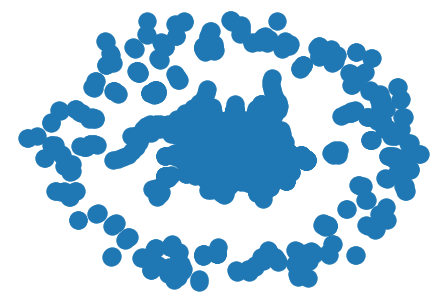

In [173]:
g = nx.from_pandas_edgelist(E.toPandas(), source='src', target='dst')
nx.draw(g)  # it takes 3 minutes

<div id="section1"   dir='rtl'>
    <h2>
برای راحتی کار دیتافریم E که (شامل نود های مبدا و مقصد که به هم  ربط دارند) ، به پانداز تبدیل می کنیم  </div>
</h2>
        <hr>

In [174]:
e=E.toPandas()

<div id="section1"   dir='rtl'>
    <h2>
در ادامه نودهای یونیک مبدا و مقصد را برای بهتر نشان دادن گراف به صورت لیست دریافت می کنیم </div>
</h2>
        <hr>

In [176]:
dst1 = list(e.dst.unique())
src1= list(e.src.unique())


#better visualization

 <div id="section1"   dir='rtl'>
    <h2>
    گام به گام در این قسمت توابع ست شده و کم کم گراف تکمیل می شود.
در این قسمت ابتدا با استفاده از همان تابعfrom_pandas_edgelist نود های مبدا و مقصد را دریافت می کنیم و با استفاده از تابع spring_layout، لایوت این گراف را ست می کنیم. می دانیم که باید سایز نود را ست کنیم که از همان درجه هر نود مقصد استفاده می کنیم سپس نودهای مقصد که یونیک هستند را با تابع draw_networkx_nodes  رسم می کنیم در ادامه نود های مبدا را رسم می کنیم و در نهایت با تابع  draw_networkx_edges یال ها را رسم می کنیم و لیبل را شناسه همان نود های مقصد هستند، با تابع draw_networkx_labels ست می کنیم. می دانیم که این نود ها مقالات هستند . همانطور که می بینیم یک شمای خوبی از گراف داده نشده است چون گراف بیش از حد بزرگ است. که در بخش دوم گراف را می شکانم(از جناب بنایی کسب اجازه شد)  </div>
</h2>
        <hr>

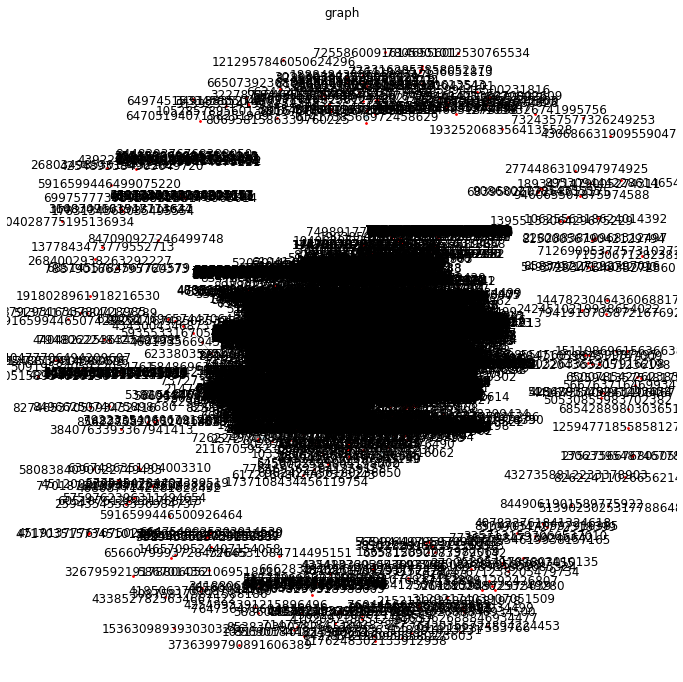

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
g = nx.from_pandas_edgelist(E.toPandas(), source='src', target='dst') 
layout = nx.spring_layout(g,iterations=50)#layout takes 3 minutes 
node_size = [g.degree(dst)  for dst in dst1]

#nodes
nx.draw_networkx_nodes(g,layout,nodelist=dst1,  node_size=node_size, node_color='lightblue')  
nx.draw_networkx_nodes(g, layout, nodelist=src1, node_color='red', node_size=3)

#edges
nx.draw_networkx_edges(g, layout, width=0.5, edge_color="gray")

#labels
node_labels = dict(zip(dst1, dst1))
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("graph")
plt.show()


#second part:1000 TOP node 

<div id="section1"   dir='rtl'>
    <h2>
در این بخش گراف اصلی را که همانطور که در زیر می بینیم که شامل 9201 نود است به 1000 نود برتر می شکانیم که حدودا 10 درصد گراف اصلی نود داریم </div>
</h2>
        <hr>

In [179]:
print( {(V.count(), len(V.columns))} ) 

{(9201, 2)}


<div id="section1"   dir='rtl'>
    <h2>
ابتدا با استفاده از دیتافریمی که در مرحله 4 برای مقالات برتر کرده بودیم، 1000 نود را دریافت می کنیم می دانیم که در این دیتافریم نودها به ترتیب درجه ی ورودی قرار دارند.(برای این ، اینکار را می کنیم تا بتوانیم یک پل ارتباطی با دیتافریم E که شامل نود های مبدا و مقصد است بزنیم تا بتوانیم ان جدول را با 1000 نود دریافت کنیم)  </div>
</h2>
        <hr>

In [180]:
V2=sqlDF_maxarticle.orderBy(desc("inDegree")).limit(1000)
V2

id,article,inDegree
946065507707541358,The Football League,327
3856212023725725593,National Football...,322
8978262722425160811,Australian Footba...,316
6245498229508734555,Southern Football...,185
7264519433548233535,Football League F...,180
5362090331808156011,Football League S...,179
277710621679830671,All-Ireland Senio...,149
1984578398767042266,Scottish Football...,145
2395551540800395672,Football League T...,134
5395033957924805072,Pro Football Hall...,130


<div id="section1"   dir='rtl'>
    <h2>
با استفاده از SQL از طریق INNERJOIN بین جدول بالا و جدول E دیتافریم جدید E2 را می سازیم به این ترتیب که ID  مقالات برتر برابر  با شناسه نود مقصد باشد</div>
</h2>
        <hr>

In [181]:
E.createOrReplaceTempView("E")
V2.createOrReplaceTempView("V2")

E2 = spark.sql("select E.src,E.dst,V2.inDegree from V2 INNER JOIN E ON V2.id = E.dst")
E2

src,dst,inDegree
5262172252914526619,277710621679830671,149
116967050588411802,6245498229508734555,185
5607555947996551905,277710621679830671,149
4514955609808040246,8978262722425160811,316
5438845213228255437,3856212023725725593,322
5165821104433214560,277710621679830671,149
1895801896303355807,277710621679830671,149
1266751915853956486,3856212023725725593,322
5730820492680757422,5395033957924805072,130
5417694557731935466,5362090331808156011,179


#simple visualization

<div id="section1"   dir='rtl'>
    <h2>
مانند قسمت بالا اول یک شمای ساده از گراف جدید رسم می کنیم</div>
</h2>
        <hr>

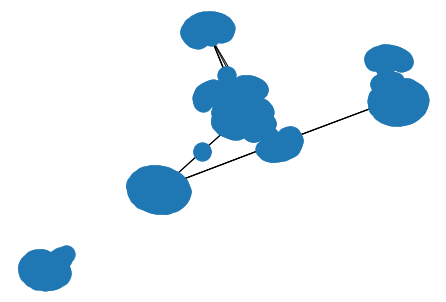

In [182]:
g2 = nx.from_pandas_edgelist(E2.toPandas(), source='src', target='dst') 
nx.draw(g2)

<div id="section1"   dir='rtl'>
    <h2>
بقیه مراحل مانند قبل است فقط با گراف جدید کار می کنیم </div>
</h2>
        <hr>

In [183]:
e2=E2.toPandas()

In [184]:
dst = list(e2.dst.unique())
dst

['277710621679830671',
 '6245498229508734555',
 '8978262722425160811',
 '3856212023725725593',
 '5395033957924805072',
 '5362090331808156011',
 '946065507707541358',
 '2395551540800395672',
 '7264519433548233535',
 '1984578398767042266']

In [185]:
src= list(e2.src.unique())
src

['5262172252914526619',
 '116967050588411802',
 '5607555947996551905',
 '4514955609808040246',
 '5438845213228255437',
 '5165821104433214560',
 '1895801896303355807',
 '1266751915853956486',
 '5730820492680757422',
 '5417694557731935466',
 '7758321141456894504',
 '3375277106052371575',
 '2322483800369883130',
 '4986605495486160558',
 '5628840708455906457',
 '1206260768889991257',
 '897331795268633014',
 '1700137805167072030',
 '8124516068075340231',
 '3747564271823618793',
 '2749229820181573951',
 '7848604356653566303',
 '1610128217265412726',
 '5949381887436636145',
 '38134951107543648',
 '4240769809143028424',
 '4633478078070536027',
 '5164648301518456129',
 '8520856293556616274',
 '3814557999739281449',
 '3789320527555692839',
 '6073124174094729956',
 '2484462768278765923',
 '755268854780451177',
 '8496353407559028949',
 '2131253591988719173',
 '8468963417848121719',
 '202853962533333151',
 '9134430602864434094',
 '362297025794371228',
 '8005203204779397051',
 '8622841715575220460',

#better visualization

<div id="section1"   dir='rtl'>
    <h2>
گراف را رسم می کنیم(توضیح توابع زیر را در رسم گراف کلی توضیح دادم) همانطور که در شکل زیر می بینیم نودهای ابی، نودهای مقصد ما، نودهای قرمز، مقالاتی هیتند که مبدا هستند و یال ها هم با رنگ خاکستری بین این مقالات هم رسم شده است. شناسه مقالات مقصد هم بر روی انها نوشته شده است </div>
</h2>
        <hr>

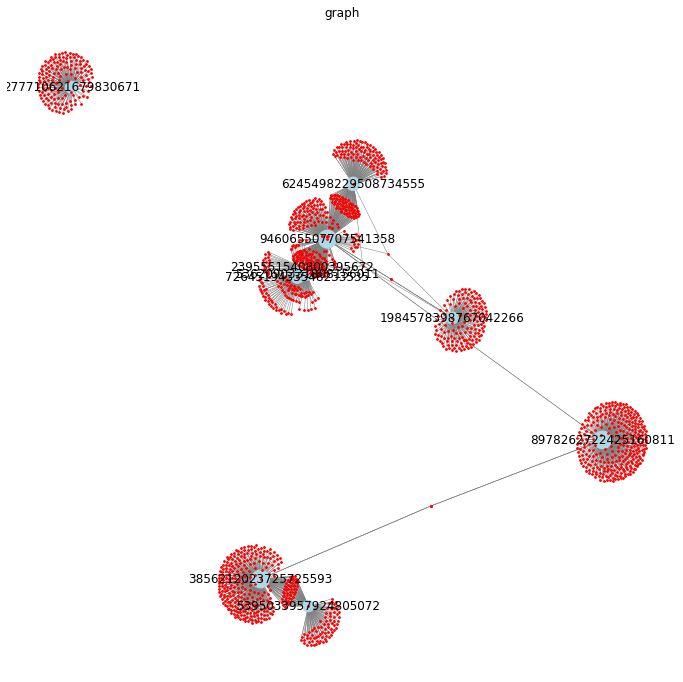

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
g2 = nx.from_pandas_edgelist(E2.toPandas(), source='src', target='dst') 
layout = nx.spring_layout(g2,iterations=50) 
node_size = [g2.degree(dst)  for dst in dst]

#nodes
nx.draw_networkx_nodes(g2,layout,nodelist=dst,  node_size=node_size,node_color='lightblue') 
nx.draw_networkx_nodes(g2, layout, nodelist=src, node_color='red', node_size=3)

#edges
nx.draw_networkx_edges(g2, layout, width=0.5, edge_color="gray")

#labels
node_labels = dict(zip(dst, dst))
nx.draw_networkx_labels(g2, layout, labels=node_labels)

plt.axis('off')
plt.title("graph")
plt.show()
